In [1]:
import numpy as np
from astropy.wcs import WCS
from astropy.io import fits
from astropy.convolution import convolve, Gaussian2DKernel
from reproject import reproject_interp, reproject_exact
import matplotlib.pyplot as plt

In [2]:
# # def get_interpolated_noise(output_size, pixel_scale, output_pixel_scale, noise_level, seed=42):
# #     # Create a WCS for the original image
# #     original_size = int(output_size / pixel_scale) + 1
# #     wcs_original = WCS(naxis=2)
# #     wcs_original.wcs.crpix = [original_size / 2, original_size / 2]
# #     wcs_original.wcs.cdelt = [pixel_scale / 3600.0, pixel_scale / 3600.0]  # Degrees per pixel
# #     wcs_original.wcs.crval = [0, 0]
# #     wcs_original.wcs.ctype = ["RA---TAN", "DEC--TAN"]

# #     # Create a WCS for the new image
# #     wcs_new = WCS(naxis=2)
# #     wcs_new.wcs.crpix = [output_size / 2, output_size / 2]
# #     wcs_new.wcs.cdelt = [output_pixel_scale / 3600.0, output_pixel_scale / 3600.0]  # Degrees per pixel
# #     wcs_new.wcs.crval = [0, 0]
# #     wcs_new.wcs.ctype = ["RA---TAN", "DEC--TAN"]

# #     rng = np.random.default_rng(seed=seed)
# #     noise = rng.normal(0, noise_level, (original_size, original_size))

# #     reprojected_noise, _ = reproject_exact(fits.PrimaryHDU(noise, header=wcs_original.to_header()), 
# #                                            output_projection=wcs_new, shape_out=(output_size, output_size))
    
# #     return reprojected_noise

# def get_interpolated_noise(noise, output_size, pixel_scale, output_pixel_scale, noise_level, seed=42):
#     # Create a WCS for the original image
#     original_size = int(output_size / pixel_scale) + 1
#     wcs_original = WCS(naxis=2)
#     wcs_original.wcs.crpix = [original_size / 2, original_size / 2]
#     wcs_original.wcs.cdelt = [pixel_scale / 3600.0, pixel_scale / 3600.0]  # Degrees per pixel
#     wcs_original.wcs.crval = [0, 0]
#     wcs_original.wcs.ctype = ["RA---TAN", "DEC--TAN"]

#     # Create a WCS for the new image
#     wcs_new = WCS(naxis=2)
#     wcs_new.wcs.crpix = [output_size / 2, output_size / 2]
#     wcs_new.wcs.cdelt = [output_pixel_scale / 3600.0, output_pixel_scale / 3600.0]  # Degrees per pixel
#     wcs_new.wcs.crval = [0, 0]
#     wcs_new.wcs.ctype = ["RA---TAN", "DEC--TAN"]

#     # rng = np.random.default_rng(seed=seed)
#     # noise = rng.normal(0, noise_level, (original_size, original_size))

#     reprojected_noise, _ = reproject_exact(fits.PrimaryHDU(noise, header=wcs_original.to_header()), 
#                                            wcs_new.to_header(), parallel=1, shape_out=(output_size, output_size))
    
#     return reprojected_noise

In [3]:
# import numpy as np
# from astropy.wcs import WCS
# from astropy.io import fits
# from astropy.convolution import convolve, Gaussian2DKernel
# from reproject import reproject_exact
# import matplotlib.pyplot as plt

# def get_interpolated_noise(output_size, pixel_scale, output_pixel_scale, noise_level, seed=42):
#     """
#     Reprojects noise to a new WCS with a different pixel scale.
#     """
#     # Create a WCS for the original image
#     original_size = int(output_size / pixel_scale) + 1
#     wcs_original = WCS(naxis=2)
#     wcs_original.wcs.crpix = [original_size / 2, original_size / 2]
#     wcs_original.wcs.cdelt = [pixel_scale / 3600.0, pixel_scale / 3600.0]  # Degrees per pixel
#     wcs_original.wcs.crval = [0, 0]
#     wcs_original.wcs.ctype = ["RA---TAN", "DEC--TAN"]

#     # Create a WCS for the new image
#     wcs_new = WCS(naxis=2)
#     wcs_new.wcs.crpix = [output_size / 2, output_size / 2]
#     wcs_new.wcs.cdelt = [output_pixel_scale / 3600.0, output_pixel_scale / 3600.0]  # Degrees per pixel
#     wcs_new.wcs.crval = [0, 0]
#     wcs_new.wcs.ctype = ["RA---TAN", "DEC--TAN"]

#     rng = np.random.default_rng(seed=seed)
#     noise = rng.normal(0, noise_level, (original_size, original_size))

#     # Reproject noise to the new WCS
#     # reprojected_noise, _ = reproject_exact(fits.PrimaryHDU(noise, header=wcs_original.to_header()), 
#     #                                        wcs_new.to_header(), shape_out=(output_size, output_size))
#     reprojected_noise, _ = reproject_exact(fits.PrimaryHDU(noise, header=wcs_original.to_header()), output_projection=wcs_new, shape_out=(output_size, output_size))

#     return reprojected_noise

# # Parameters
# output_size = 512
# pixel_scale = 8.333
# output_pixel_scale = 1.0
# noise_level = 2
# seed = 24

# # Compute original image size
# original_size = int(output_size / pixel_scale) + 1

# # Generate Gaussian point sources
# num_sources = 1000
# positions = np.random.uniform(0, original_size, (num_sources, 2))
# amplitudes = np.random.uniform(0.5, 1.5, num_sources) * 10

# image = np.zeros((original_size, original_size))
# y, x = np.meshgrid(np.arange(original_size), np.arange(original_size))
# for pos, amp in zip(positions, amplitudes):
#     image += amp * np.exp(-((x - pos[0])**2 + (y - pos[1])**2) / (2 * (1.0)**2))

# # Convolve with a Gaussian PSF
# psf = Gaussian2DKernel(1.5)
# image_psf = convolve(image, psf)

# # Add Gaussian noise
# rng = np.random.default_rng(seed=seed)
# noise = rng.normal(0, noise_level, (original_size, original_size))
# image_with_noise = image_psf + noise

# # Create WCS for original and reprojected images
# wcs_original = WCS(naxis=2)
# wcs_original.wcs.crpix = [original_size / 2, original_size / 2]
# wcs_original.wcs.cdelt = [pixel_scale / 3600.0, pixel_scale / 3600.0]
# wcs_original.wcs.crval = [0, 0]
# wcs_original.wcs.ctype = ["RA---TAN", "DEC--TAN"]

# wcs_new = WCS(naxis=2)
# wcs_new.wcs.crpix = [output_size / 2, output_size / 2]
# wcs_new.wcs.cdelt = [output_pixel_scale / 3600.0, output_pixel_scale / 3600.0]
# wcs_new.wcs.crval = [0, 0]
# wcs_new.wcs.ctype = ["RA---TAN", "DEC--TAN"]

# # Reproject the original image and noise separately
# target_shape = (output_size, output_size)
# reprojected_image, _ = reproject_exact(fits.PrimaryHDU(image_psf, header=wcs_original.to_header()), 
#                                        output_projection=wcs_new, shape_out=target_shape)
# reprojected_noise = get_interpolated_noise(output_size, pixel_scale, output_pixel_scale, noise_level, seed=seed)

# # Check equivalence
# combined_reprojection, _ = reproject_exact(fits.PrimaryHDU(image_with_noise, header=wcs_original.to_header()), 
#                                            output_projection=wcs_new, shape_out=target_shape)
# separate_sum = reprojected_image + reprojected_noise

# # Plot results
# fig, ax = plt.subplots(2, 3, figsize=(15, 10))
# ax[0, 0].imshow(image_psf, origin="lower", cmap="gray")
# ax[0, 0].set_title("Original Image (Signal)")
# ax[0, 1].imshow(noise, origin="lower", cmap="gray")
# ax[0, 1].set_title("Original Noise")
# ax[0, 2].imshow(combined_reprojection, origin="lower", cmap="gray")
# ax[0, 2].set_title("Reprojected Image + Noise")

# ax[1, 0].imshow(reprojected_image, origin="lower", cmap="gray")
# ax[1, 0].set_title("Reprojected Image (Signal)")
# ax[1, 1].imshow(reprojected_noise, origin="lower", cmap="gray")
# ax[1, 1].set_title("Reprojected Noise")
# ax[1, 2].imshow(np.abs(combined_reprojection - separate_sum), origin="lower", cmap="gray", vmin=0, vmax=1e-4)
# ax[1, 2].set_title("Difference: f(A1 + N) vs f(A1) + f(N)")

# plt.tight_layout()
# plt.show()


In [4]:
# Re-import necessary libraries
import numpy as np
from astropy.wcs import WCS
from astropy.io import fits
from astropy.convolution import convolve, Gaussian2DKernel
from reproject import reproject_exact

def get_interpolated_noise(noise, output_size, pixel_scale, output_pixel_scale, noise_level, seed=42):
    """
    Reprojects noise to a new WCS with a different pixel scale.
    """
    # Create a WCS for the original image
    original_size = int(output_size / pixel_scale) + 2
    wcs_original = WCS(naxis=2)
    wcs_original.wcs.crpix = [original_size / 2, original_size / 2]
    wcs_original.wcs.cdelt = [pixel_scale / 3600.0, pixel_scale / 3600.0]  # Degrees per pixel
    wcs_original.wcs.crval = [250, 2]
    wcs_original.wcs.ctype = ["RA---TAN", "DEC--TAN"]

    # Create a WCS for the new image
    wcs_new = WCS(naxis=2)
    wcs_new.wcs.crpix = [output_size / 2, output_size / 2]
    wcs_new.wcs.cdelt = [output_pixel_scale / 3600.0, output_pixel_scale / 3600.0]  # Degrees per pixel
    wcs_new.wcs.crval = [250, 2]
    wcs_new.wcs.ctype = ["RA---TAN", "DEC--TAN"]

    rng = np.random.default_rng(seed=seed)
    noise = rng.normal(0, noise_level, (original_size, original_size))

    # Reproject noise to the new WCS
    # reprojected_noise, _ = reproject_exact(fits.PrimaryHDU(noise, header=wcs_original.to_header()), 
    #                                        wcs_new.to_header(), shape_out=(output_size, output_size))
    
    # reprojected_noise, _ = reproject_exact(fits.PrimaryHDU(noise, header=wcs_original.to_header()), output_projection=wcs_new, shape_out=(output_size, output_size))
    reprojected_noise, _ = reproject_exact(input_data=(noise, wcs_original.to_header()), output_projection=wcs_new, shape_out=(output_size, output_size), parallel=False)   

    return reprojected_noise


# Parameters
output_size = 256
pixel_scale = 12
output_pixel_scale = 1
noise_level = 1e-5
seed = 24

# Compute original image size
original_size = int(output_size / pixel_scale) + 2

# Create a WCS for the original image
wcs_original = WCS(naxis=2)
wcs_original.wcs.crpix = [original_size / 2, original_size/ 2]
wcs_original.wcs.cdelt = [pixel_scale / 3600.0, pixel_scale / 3600.0]
wcs_original.wcs.crval = [0, -2]
wcs_original.wcs.ctype = ["RA---TAN", "DEC--TAN"]

# Create a WCS for the new image
new_size = output_size
wcs_new = WCS(naxis=2)
wcs_new.wcs.crpix = [new_size / 2, new_size / 2]
wcs_new.wcs.cdelt = [output_pixel_scale / 3600.0, output_pixel_scale / 3600.0]
wcs_new.wcs.crval = [0, -2]
wcs_new.wcs.ctype = ["RA---TAN", "DEC--TAN"]

# Simulate Gaussian point sources
np.random.seed(42)
num_sources = 10
positions = np.random.uniform(0, original_size, (num_sources, 2))
amplitudes = np.random.uniform(0.5, 1.5, num_sources)

image = np.zeros((original_size, original_size))
for pos, amp in zip(positions, amplitudes):
    y, x = np.meshgrid(np.arange(original_size), np.arange(original_size))
    image += amp * np.exp(-((x - pos[0])**2 + (y - pos[1])**2) / (2 * (1.0)**2))

# Convolve with a Gaussian PSF
psf = Gaussian2DKernel(1.5)
image_psf = convolve(image, psf)

# Add Gaussian noise
rng = np.random.default_rng(seed=seed)
noise = rng.normal(0, noise_level, (original_size, original_size))
image_with_noise = image_psf + noise

# Reproject the original image and noise separately
original_hdu = fits.PrimaryHDU(image_with_noise, header=wcs_original.to_header())
target_shape = (new_size, new_size)

# reprojected_image_with_noise, _ = reproject_exact(original_hdu, output_projection=wcs_new, shape_out=target_shape)
# reprojected_image, _ = reproject_exact(fits.PrimaryHDU(image_psf, header=wcs_original.to_header()), 
#                                        output_projection=wcs_new, shape_out=target_shape)
# reprojected_noise, _ = reproject_exact(fits.PrimaryHDU(noise, header=wcs_original.to_header()), 
#                                        output_projection=wcs_new, shape_out=target_shape)

# reprojected_image_with_noise, _ = reproject_exact(input_data=(image_with_noise, wcs_original.to_header()), output_projection=wcs_new, shape_out=(output_size, output_size), parallel=False)
reprojected_image, _ = reproject_exact(input_data=(image_psf, wcs_original.to_header()), output_projection=wcs_new, shape_out=(output_size, output_size), parallel=False)
reprojected_noise = get_interpolated_noise(noise, output_size, pixel_scale, output_pixel_scale, noise_level, seed=seed)


# Combined reprojection
# combined_reprojection, _ = reproject_exact(fits.PrimaryHDU(image_with_noise, header=wcs_original.to_header()), 
#                                            output_projection=wcs_new, shape_out=target_shape)
combined_reprojection, _ = reproject_exact(input_data=(image_with_noise, wcs_original.to_header()), output_projection=wcs_new, shape_out=(output_size, output_size), parallel=False)
separate_sum = reprojected_image + reprojected_noise

# Compute the maximum non-NaN value of the absolute difference
max_diff = np.nanmax(np.abs(combined_reprojection - separate_sum))
max_diff


1.6895415899664812e-09

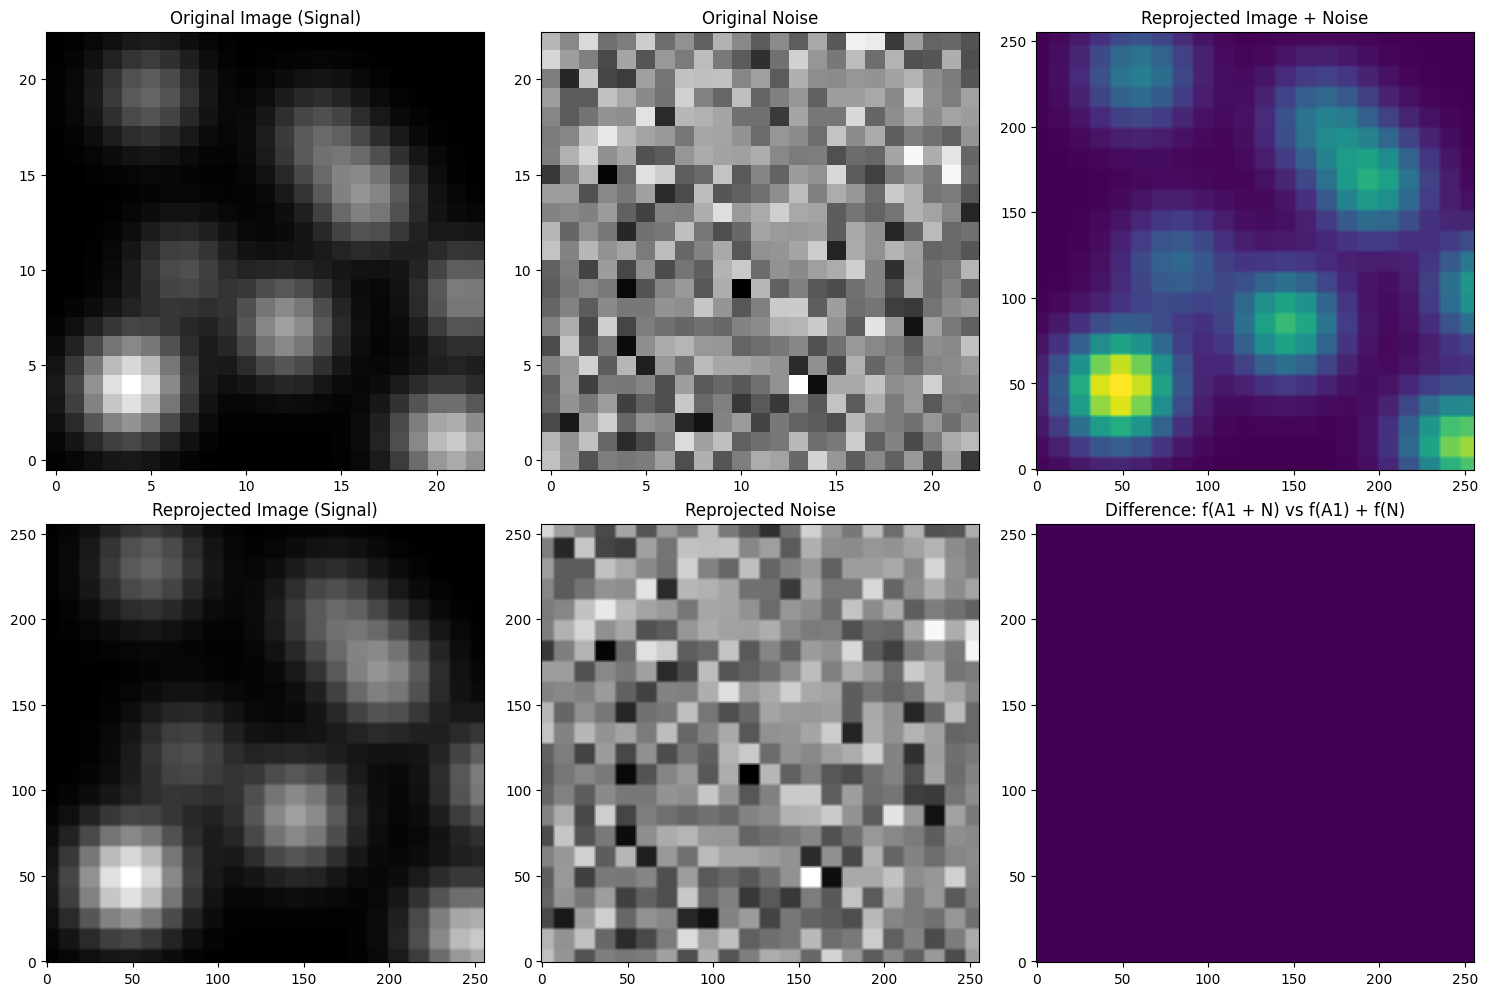

In [5]:
# Plot results
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(image_psf, origin="lower", cmap="gray")
ax[0, 0].set_title("Original Image (Signal)")
ax[0, 1].imshow(noise, origin="lower", cmap="gray")
ax[0, 1].set_title("Original Noise")
ax[0, 2].imshow(combined_reprojection, origin="lower", cmap="viridis", vmin=0, vmax=0.5)
ax[0, 2].set_title("Reprojected Image + Noise")

ax[1, 0].imshow(reprojected_image, origin="lower", cmap="gray")
ax[1, 0].set_title("Reprojected Image (Signal)")
ax[1, 1].imshow(reprojected_noise, origin="lower", cmap="gray")
ax[1, 1].set_title("Reprojected Noise")
ax[1, 2].imshow(combined_reprojection - separate_sum, origin="lower", cmap="viridis", vmin=0, vmax=1e-6)
ax[1, 2].set_title("Difference: f(A1 + N) vs f(A1) + f(N)")

plt.tight_layout()
plt.show()